In [9]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import os
os.system('')

0

In [13]:
batch_size = 64
no_cuda = False

use_cuda = not no_cuda and torch.cuda.is_available()
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])),
    batch_size=batch_size,
    shuffle=True,
    **kwargs
)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])),
    batch_size=batch_size,
    shuffle=True,
    **kwargs
)

tensor(2)


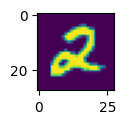

tensor(8)


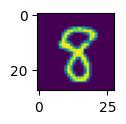

tensor(4)


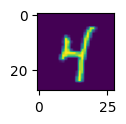

tensor(1)


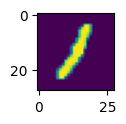

In [14]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

for data, target in train_loader:
    for i in range(4):
        print(target[i])
        plt.figure(figsize=(1, 1))
        plt.imshow(data[i, 0, :, :])
        plt.show()

    break

In [16]:
class Simple_net(nn.Module):
    def __init__(self, hidden, out_sz):
        super(Simple_net, self).__init()
        self.fc1 = nn.Linear(28**2, hidden)
        #self.fc2 = nn.Linear(hidden, hidden)
        self.fc3 = nn.Linear(hidden, out_sz)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.leaky_relu(x)

        #x = self.fc2(x)
        #x = F.leaky_relu(x)

        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)

        return output

In [17]:
def train(model, device, train_loader, optimizer, epoch, log_interval, loss_archive):
    train_loss = 0

    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nnl_loss(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * batch_size

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()
            ))

        train_loss /= len(train_loader.dataset)
        loss_archive.append(train_loss)